In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /gdrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/gdrive


In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 29.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=fd594832775cdd8617967256300d5b354d10348c049f393088937b9985ac8fac
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.2 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=2542c2e9f0042b3ec9d9625a8a51f14e7f0557d53ecc4054d698d616e4a9cb97
  Stored in directory: /tmp/pip-ephem-wheel-cache-v7wpsbwg/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
from gensim import corpora
from gensim import models
import pyLDAvis
import pyLDAvis.gensim_models
import spacy
import json
import csv
import matplotlib
import en_core_web_lg
import numpy as np

nlp = en_core_web_lg.load()

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [ ]:
documents = []
count = 0
with open("/content/drive/MyDrive/Team A8/CIS 509/TeslaLounge_output.csv",encoding = "utf8" ) as file:
    csvreader = csv.reader(file)
    for line in csvreader: 
        if count == 0:         #skip first row of dataset
            print(line)
            count+=1
        else: 
            text = line[5]
            doc = nlp(text)
            if len(doc) <= 5:        # exclude comments with five or less than five words
                pass
            else:
                documents.append(text.replace("'","").replace('-',"").replace("=","").replace(":","").replace("%","").replace("*","").replace('"',"").replace("!","").replace(".","").replace("?","").replace("[","").replace("]","").replace(")","").replace("(","").replace("  "," ").replace('\"'," ").replace("\'"," ").replace("/"," ").replace("\\"," "))
        
processed_documents = []             # list for storing tokenized documents
          
for document in documents: 
    temp_list = []                   # list for storing tokens in a document
    for token in nlp(document):
        if token.is_stop is True:    # check whether the provided token is a stop word and decide whether to disregard it
            pass
        elif not nlp.vocab.has_vector(str(token)):      # check whether the provided token is in a vocabulary
            pass
        else:
            temp_list.append(str(token.lemma_.lower()))      # lemmatize
    processed_documents.append(temp_list) 
dictionary = corpora.Dictionary(processed_documents)         # index words with integers
corpus = [dictionary.doc2bow(sentence) for sentence in processed_documents]        # TF representation
tfidf = models.TfidfModel(corpus)     # Fit TF-IDF
corpus_tfidf = tfidf[corpus]          # Transform "corpus" into TF-IDF



['commentID', 'Comment_Timestamp', 'Author', 'ThreadID', 'ThreadTitle', 'commonBody', 'ReplyTo', 'Permalink']


流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interf

In [ ]:
from gensim.models import CoherenceModel

# Coherence measures over different K
num_of_topics = []
coherence = []
for k in range(29):
    lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=k+2) # train LDA model; k+2 because we are only intereseted when K >= 2
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
    coherence_lda = coherence_model_lda.get_coherence()
    num_of_topics.append(k+2)
    coherence.append(coherence_lda)

流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad 

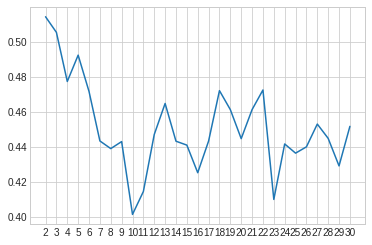

In [ ]:
# Visualizaing coherence measures over different K
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(num_of_topics, coherence) # x-axis = K, y-axis = coherece measures
plt.xticks(num_of_topics) # To label x-axis with K values
plt.show()

Train LDA Model

In [ ]:
# train LDA model
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=4)   # train LDA model




NameError: ignored

In [ ]:
for topic in lda_model.show_topics(num_topics=4, num_words=5):# show 5 most important words for each topic
    print(topic)

print(corpus_tfidf[0])
for topic_proportion in lda_model[corpus_tfidf[0]]:    # show topic distribution for the first document in the corpus
    print(topic_proportion)
counter = 0

kklist = [[],[],[],[]]

for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
    print(doc, ": ", topic_dist)
    trans_matrix = np.array(list(map(list,topic_dist))).T
    max_index = np.argmax(trans_matrix[1])
    kklist[max_index].append(doc)
    print(max_index)
 

流式输出内容被截断，只能显示最后 5000 行内容。
THANK YOU Why do I feel like I’m the only one bothered by this If you’re going to post it somewhere and aren’t even switching camera views upload the actual video  rant :  [(0, 0.37466192), (1, 0.066170275), (2, 0.500732), (3, 0.05843575)]
2
I usually record it on my phone first if its important then pull the USB incase something happens Ill still have it Just switched to a Pi running TeslaUSB so the archiving makes me feel better too :  [(0, 0.057238378), (1, 0.36228555), (2, 0.39173016), (3, 0.18874586)]
2
I mean only at home that would Work is only if the paint itself isn’t damaged meaning only clear coat You could then get away with a scratchX polishing kit Just attach the round pad to a drill and use the compound If the paint is damaged deep scratch you’ll need to repaint touch up on a large area would look terrible :  [(0, 0.2965305), (1, 0.16358212), (2, 0.044878684), (3, 0.49500868)]
3
If you caught it on cam post the idiots face all over the internet

Export splited topic comments

In [ ]:
import pandas as pd

In [ ]:
len(kklist[0])

for i in range(len(kklist)):
    name = "Topic number {}".format(i+1)
    df_write = pd.DataFrame(data = kklist[i], columns = [name])
    df_write.to_csv("/content/drive/MyDrive/Team A8/CIS 509/Topic_{}_document.csv".format(name))

In [ ]:
!pip install happytransformer
from happytransformer import HappyTextClassification
classifier = HappyTextClassification(model_type="DISTILBERT", model_name="distilbert-base-uncased-finetuned-sst-2-english", num_labels=2)

     |████████████████████████████████| 45 kB 2.4 MB/s 
     |████████████████████████████████| 325 kB 42.3 MB/s 
     |████████████████████████████████| 4.0 MB 49.6 MB/s 
     |████████████████████████████████| 1.2 MB 47.9 MB/s 
     |████████████████████████████████| 1.1 MB 51.1 MB/s 
     |████████████████████████████████| 212 kB 60.8 MB/s 
     |████████████████████████████████| 136 kB 67.9 MB/s 
     |████████████████████████████████| 77 kB 7.0 MB/s 
     |████████████████████████████████| 127 kB 49.4 MB/s 
     |████████████████████████████████| 895 kB 47.5 MB/s 
     |████████████████████████████████| 6.6 MB 43.8 MB/s 
     |████████████████████████████████| 596 kB 5.8 MB/s 
     |████████████████████████████████| 144 kB 44.4 MB/s 
     |████████████████████████████████| 94 kB 1.7 MB/s 
     |████████████████████████████████| 271 kB 34.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully unins

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

04/25/2022 00:41:29 - INFO - happytransformer.happy_transformer -   Using model: cpu


In [ ]:
import pandas as pd
import numpy as np
CommentsTopic_1 = pd.read_csv('/content/drive/MyDrive/Team A8/CIS 509/Topic_Topic number 1_document.csv',index_col=0)
CommentsTopic_2 = pd.read_csv('/content/drive/MyDrive/Team A8/CIS 509/Topic_Topic number 2_document.csv',index_col=0)
CommentsTopic_3 = pd.read_csv('/content/drive/MyDrive/Team A8/CIS 509/Topic_Topic number 3_document.csv',index_col=0)
CommentsTopic_4 = pd.read_csv('/content/drive/MyDrive/Team A8/CIS 509/Topic_Topic number 4_document.csv',index_col=0)

In [ ]:
CommentsTopic_1.head()

,Topic number 1
0,Clearly that tree was about to step off the curb
1,Thats worse than AP1 My goodness
2,And you failed at the simplest task to take ov...
3,Just trying to hit the apex of the turn
4,You r on drunk mode


##For Topic_1

In [ ]:
labels = []
accuracies = []
temp_Data = CommentsTopic_1.copy()
cnt = 1
for i,row in temp_Data.iterrows():
  try:
    sentiment = classifier.classify_text(row['Topic number 1'])
    accuracies.append(sentiment.score)
    labels.append(sentiment.label)

  except ValueError:
    print("Number {} line got ValueError probelm.".format(i))
    temp_Data.drop([i], inplace=True, axis=0)
    pass

  except RuntimeError:
    print("Number {} line got RuntimeError probelm.".format(i))
    temp_Data.drop([i], inplace=True, axis=0)
    pass

Number 992 line got RuntimeError probelm.
Number 1283 line got RuntimeError probelm.
Number 2605 line got ValueError probelm.


In [ ]:
temp_Data["label"] = labels
temp_Data["accuracy"] = accuracies

temp_Data

,Topic number 1,label,accuracy
0,Clearly that tree was about to step off the curb,NEGATIVE,0.963161
1,Thats worse than AP1 My goodness,NEGATIVE,0.999494
2,And you failed at the simplest task to take ov...,NEGATIVE,0.999499
3,Just trying to hit the apex of the turn,NEGATIVE,0.988333
4,You r on drunk mode,NEGATIVE,0.996323
...,...,...,...
3362,Oh yes you caught me I have a small Peter and ...,POSITIVE,0.553459
3363,I sold my Mercedes to my FIL after picking up ...,NEGATIVE,0.999666
3364,Im to the point now where I cant even consider...,NEGATIVE,0.998918
3365,Yeah its embarrassing Its actually the reason ...,NEGATIVE,0.952073


In [ ]:
results = pd.DataFrame(temp_Data, columns=['Topic number 1', 'label', 'accuracy'])
results.to_csv("/content/drive/MyDrive/Team A8/CIS 509/Topic_1_label_accuracy.csv", index=None)

In [ ]:
Number_of_Positive = labels.count("POSITIVE")
Number_of_Negative = labels.count("NEGATIVE")
Total_Labels = Number_of_Positive + Number_of_Negative
Percentage_of_Positive = round(Number_of_Positive/Total_Labels,2)
Percentage_of_Negative = round(Number_of_Negative/Total_Labels,2)
print("There are", Percentage_of_Positive, "% of positive comments in topic_1")
print("There are", Percentage_of_Negative, "% of negative comments in topic_1")

There are 0.24 % of positive comments in topic_1
There are 0.76 % of negative comments in topic_1


##Topic_2

In [ ]:
labels = []
accuracies = []
temp_Data = CommentsTopic_2.copy()
cnt = 1
for i,row in temp_Data.iterrows():
  try:
    sentiment = classifier.classify_text(row['Topic number 2'])
    accuracies.append(sentiment.score)
    labels.append(sentiment.label)

  except ValueError:
    print("Number {} line got ValueError probelm.".format(i))
    temp_Data.drop([i], inplace=True, axis=0)
    pass

  except RuntimeError:
    print("Number {} line got RuntimeError probelm.".format(i))
    temp_Data.drop([i], inplace=True, axis=0)
    pass

Number 610 line got RuntimeError probelm.
Number 1643 line got RuntimeError probelm.
Number 2045 line got RuntimeError probelm.
Number 2315 line got RuntimeError probelm.
Number 2449 line got RuntimeError probelm.
Number 2731 line got RuntimeError probelm.
Number 3577 line got RuntimeError probelm.
Number 4223 line got RuntimeError probelm.
Number 5684 line got RuntimeError probelm.


In [ ]:

temp_Data["label"] = labels
temp_Data["accuracy"] = accuracies

results = pd.DataFrame(temp_Data, columns=['Topic number 2', 'label', 'accuracy'])
results.to_csv("/content/drive/MyDrive/Team A8/CIS 509/Topic_2_label_accuracy.csv", index=None)

Number_of_Positive = labels.count("POSITIVE")
Number_of_Negative = labels.count("NEGATIVE")
Total_Labels = Number_of_Positive + Number_of_Negative
Percentage_of_Positive = round(Number_of_Positive/Total_Labels,2)
Percentage_of_Negative = round(Number_of_Negative/Total_Labels,2)
print("There are", Percentage_of_Positive, "% of positive comments in topic_2")
print("There are", Percentage_of_Negative, "% of negative comments in topic_2")


There are 0.23 % of positive comments in topic_2
There are 0.77 % of negative comments in topic_2


##Topic_3

In [ ]:
labels = []
accuracies = []
temp_Data = CommentsTopic_3.copy()
cnt = 1
for i,row in temp_Data.iterrows():
  try:
    sentiment = classifier.classify_text(row['Topic number 3'])
    accuracies.append(sentiment.score)
    labels.append(sentiment.label)

  except ValueError:
    print("Number {} line got ValueError probelm.".format(i))
    temp_Data.drop([i], inplace=True, axis=0)
    pass

  except RuntimeError:
    print("Number {} line got RuntimeError probelm.".format(i))
    temp_Data.drop([i], inplace=True, axis=0)
    pass

Number 712 line got RuntimeError probelm.
Number 951 line got RuntimeError probelm.
Number 1998 line got RuntimeError probelm.
Number 2169 line got RuntimeError probelm.
Number 3219 line got RuntimeError probelm.


In [ ]:

temp_Data["label"] = labels
temp_Data["accuracy"] = accuracies

results = pd.DataFrame(temp_Data, columns=['Topic number 3', 'label', 'accuracy'])
results.to_csv("/content/drive/MyDrive/Team A8/CIS 509/topic_3_label_accuracy.csv", index=None)

Number_of_Positive = labels.count("POSITIVE")
Number_of_Negative = labels.count("NEGATIVE")
Total_Labels = Number_of_Positive + Number_of_Negative
Percentage_of_Positive = round(Number_of_Positive/Total_Labels,2)
Percentage_of_Negative = round(Number_of_Negative/Total_Labels,2)
print("There are", Percentage_of_Positive, "% of positive comments in topic_3")
print("There are", Percentage_of_Negative, "% of negative comments in topic_3")


There are 0.22 % of positive comments in topic_3
There are 0.78 % of negative comments in topic_3


##Topic_4

In [ ]:
labels = []
accuracies = []
temp_Data = CommentsTopic_4.copy()
cnt = 1
for i,row in temp_Data.iterrows():
  try:
    sentiment = classifier.classify_text(row['Topic number 4'])
    accuracies.append(sentiment.score)
    labels.append(sentiment.label)

  except ValueError:
    print("Number {} line got ValueError probelm.".format(i))
    temp_Data.drop([i], inplace=True, axis=0)
    pass

  except RuntimeError:
    print("Number {} line got RuntimeError probelm.".format(i))
    temp_Data.drop([i], inplace=True, axis=0)
    pass

In [ ]:

temp_Data["label"] = labels
temp_Data["accuracy"] = accuracies

results = pd.DataFrame(temp_Data, columns=['Topic number 4', 'label', 'accuracy'])
results.to_csv("/content/drive/MyDrive/Team A8/CIS 509/topic_4_label_accuracy.csv", index=None)

Number_of_Positive = labels.count("POSITIVE")
Number_of_Negative = labels.count("NEGATIVE")
Total_Labels = Number_of_Positive + Number_of_Negative
Percentage_of_Positive = round(Number_of_Positive/Total_Labels,2)
Percentage_of_Negative = round(Number_of_Negative/Total_Labels,2)
print("There are", Percentage_of_Positive, "% of positive comments in topic_4")
print("There are", Percentage_of_Negative, "% of negative comments in topic_4")


There are 0.27 % of positive comments in topic_4
There are 0.73 % of negative comments in topic_4


In [ ]:
# financialBERT
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

model = BertForSequenceClassification.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis",num_labels=3)
tokenizer = BertTokenizer.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis")

nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


In [ ]:
labels_bert = []
accuracies_bert = []
comment = []
bert_Data = Data.copy()
for i,row in bert_Data.iterrows():
  try:
    comment.append(row['Topic number 1'])
    accuracies_bert.append(sentiment.score)
    labels.append(sentiment.label)

  except RuntimeError:
    print("Number {} line got probelm.".format(i))
    temp_Data.drop([i], inplace=True, axis=0)
    pass

In [ ]:
labels = []
accuracies = []
temp_Data = Data.copy()
for i,row in temp_Data.iterrows():
  try:
    sentiment = classifier.classify_text(row['Topic number 1'])
    accuracies.append(sentiment.score)
    labels.append(sentiment.label)

  except RuntimeError:
    print("Number {} line got probelm.".format(i))
    temp_Data.drop([i], inplace=True, axis=0)
    pass

In [ ]:
# financialBERT
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

model = BertForSequenceClassification.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis",num_labels=3)
tokenizer = BertTokenizer.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis")

nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

sentences = []
for i in Data.index:
  sentences.append(Data['Topic number 1'][i])


results = nlp(sentences)
print(results)

Token indices sequence length is longer than the specified maximum sequence length for this model (597 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: ignored

In [ ]:
new_val=[m['label'] for m in results if 'label' in m]
new_val2=[m['score'] for m in results if 'score' in m]
print(new_val)
print(new_val2)

['neutral']
[0.9994606375694275]
